**Policy Evaluation**

In this exercise, we are going to implement Policy Evaluation, an iterative method to evaluate a policy, in the next MDP:

![alt text](two_state_mdp.png "Title")

Let us start with the imports. We use only numpy and matplotlib in this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let us define the parameters of the problem. We have an MDP with two states, and two actions. The rewards, discount factor, and transition probabilities are given in the figure above. We also know the optimal policy beforehand from previous exercises:

In [2]:
gamma = 0.9
R = np.array([[-1, 0.6, 0.5, -0.9]]).T
P = np.array([[0.8, 0.2], [0.2, 0.8], [0.3, 0.7], [0.9, 0.1]])
pi_opt = np.array([[0, 1, 0, 0], [0, 0, 1, 0]])

First, we obtain the optimal value function $v^{\pi^* }$ and the optimal action-value function $q^{\pi^*}$ using the fixed-point Bellman equations, in order to assess the accuracy of our implementation:
* $v^{\pi} = \left( I - \gamma \mathcal{P}^{\pi} \right)^{-1} \mathcal{R}^{\pi}$
* $q^{\pi} = \left( I - \gamma \mathcal{P} \Pi \right)^{-1} \mathcal{R}$

In [3]:
v_opt = (np.linalg.inv(np.eye(pi_opt.shape[0]) - gamma * pi_opt @ P) @ pi_opt @ R).flatten()
q_opt = (np.linalg.inv(np.eye(P.shape[0]) - gamma * P @ pi_opt) @ R).flatten()
with np.printoptions(precision=2, suppress=True):
    print(f"Policy = {pi_opt.flatten()}")
    print(f"v^* = {v_opt}")
    print(f"q^* = {q_opt}")

Policy = [0 1 0 0 0 0 1 0]
v^* = [5.34 5.25]
q^* = [3.79 5.34 5.25 3.9 ]


Now, we are going to implement Policy Evaluation, an iterative method, for the state value function, following the algorithm seen in the slides:

In [4]:
n_states = 2
v_pi_pe = [np.zeros((n_states, 1))]  # Initialize the value function to 0
threshold = 1e-3  # Variation change for convergence check
delta = 1.0  # Difference value
i = 0  # Number of iters of PE
while delta > threshold:
  # To be filled by the student
  i += 1
print('State value function obtained (PE converged after ', i, ' iterations)')

with np.printoptions(precision=2, suppress=True):  # Print the values obtained
    print(f"Policy = {pi_opt.flatten()}")
    print(f"v^* theory = {v_opt}")
    print(f"v^* PE = {v_pi_pe[-1].flatten()}")

State value function obtained (PE converged after  61  iterations)
Policy = [0 1 0 0 0 0 1 0]
v^* theory = [5.34 5.25]
v^* PE = [5.33 5.24]


We are also going to show the convergence of the state value function obtained with Policy Evaluation, where we see how the values converge to the actual ones that we obtained using the Bellman equations:

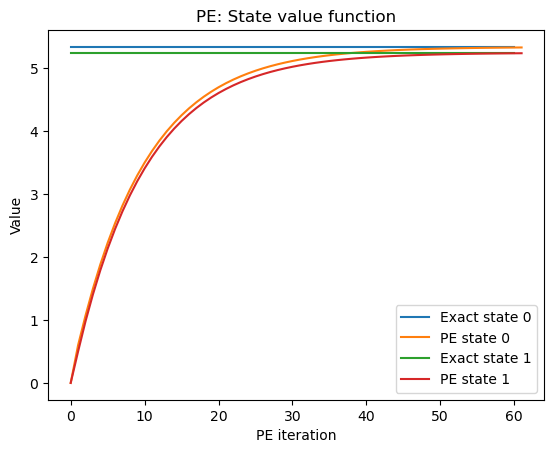

In [5]:
for s in range(n_states):
  plt.plot(v_opt[s] * np.ones((i,)), label='Exact state ' + str(s))
  plt.plot([v[s] for v in v_pi_pe], label='PE state ' + str(s))
plt.legend(loc='best')
plt.xlabel('PE iteration')
plt.ylabel('Value')
plt.title('PE: State value function')
plt.show()

And we are going to repeat the procedure, but instead of finding the state value function, we are going to obtain the state-action value function, following the algorithm seen in the slides:

In [6]:
n_states_actions = 2 * 2
q_pi_pe = [np.zeros((n_states_actions, 1))]  # Initialize the value to 0
threshold = 1e-3  # Variation change for convergence check
delta = 1.0  # Difference value
i = 0  # Number of iters of PE
while delta > threshold:
  # To be filled by the student
print('State-action value function obtained (PE converged after ', i, ' iterations)')

with np.printoptions(precision=2, suppress=True):  # Print the values obtained
    print(f"Policy = {pi_opt.flatten()}")
    print(f"q^* theory = {q_opt}")
    print(f"q^* PE = {q_pi_pe[-1].flatten()}")

State-action value function obtained (PE converged after  61  iterations)
Policy = [0 1 0 0 0 0 1 0]
q^* theory = [3.79 5.34 5.25 3.9 ]
q^* PE = [3.78 5.33 5.24 3.89]


We are also going to show the convergence of the state-action value function obtained with Policy Evaluation, where we see how the values converge to the actual ones that we obtained using the Bellman equations:

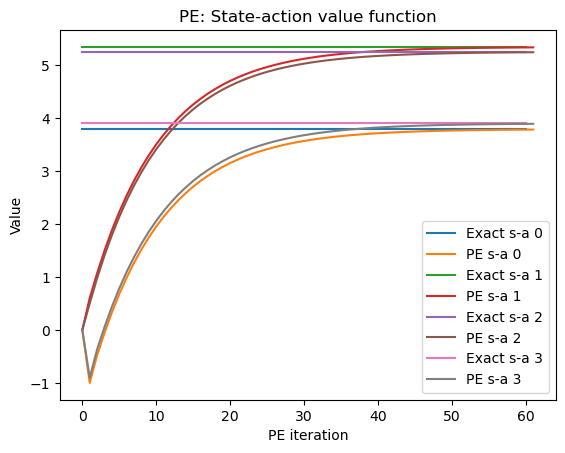

In [7]:
for s in range(n_states_actions):
  plt.plot(q_opt[s] * np.ones((i,)), label='Exact s-a ' + str(s))
  plt.plot([q[s] for q in q_pi_pe], label='PE s-a ' + str(s))
plt.legend(loc='best')
plt.xlabel('PE iteration')
plt.ylabel('Value')
plt.title('PE: State-action value function')
plt.show()